# Integrating `Google BigQuery` with python `pandas`
## Purpose: The purpose of this notebook is to provide instructions on how to read and write data from Google BigQuery using python pandas

### After completing this notebook you should be able to:
1. Create a query object using standard SQL dialect
2. Read BigQuery data including a vast amount of public data
3. Create pandas DataFrames from BigQuery 
4. Write tables to BigQuery from pandas

# Prerequisite Software Installation: 
>- `Anaconda Navigator` and `Google BigQuery`
## `Anaconda Navigator`
1. You will need to have Anaconda Navigator to launch jupyter notebooks and follow along with this tutorial
2. To download Anaconda Navigator:
>- Click this link: https://www.anaconda.com/distribution/
>- Click your operating system
>- Download a version of Python 3 (currently version 3.7)
>- Once Anaconda Navigator is installed you can launch `jupyter notebook` from the navigator and follow along with this tutorial

## `Google BigQuery`
1. You must have a BigQuery account and project set up before completing this tutorial. You can create a free account by following the directions below
>- Go to, https://console.cloud.google.com/getting-started
>>- In the navigation pane on the left, find `BigQuery` under  the BIG DATA section
>>- https://console.cloud.google.com/bigquery
>- Create or sign into your google account
>- Accept the terms of service

2. Before you can use the BigQuery sandbox, you must create a project. Follow the prompts to create your new project. 
>- After you name and create your project, the BigQuery web UI will display a sandbox banner. 
>- Click on your project located in the left hand sidebar
>- Your project is where you can create your own datasets and tables

### `Google BigQuery` sources
#### The following sources are helpful for learning about BigQuery

>- BigQuery Quick Start Guides: https://cloud.google.com/bigquery/docs/quickstarts?_ga=2.57963114.-1754509445.1563288544
>- BigQuery for Data Warehouse Practitioners: https://cloud.google.com/solutions/bigquery-data-warehouse?_ga=2.46994023.-1754509445.1563288544



# Install the pandas Google BigQuery module, `pandas_gbq`
>- After installing `Anaconda Navigator` and setting up Google BigQuery, you are ready to start this tutorial

>- `pandas_gbq` documentation for more information and troubleshooting
>>- https://pandas-gbq.readthedocs.io/en/latest/

### Install the `pandas_gbq` Package
>- Mac Users: open a new terminal window and type the following commands
>>- `pip install pandas-gbq -U`
>- Windows Users: open the Anaconda prompt shell and type the following commands
>>- `conda install pandas-gbq --channel conda-forge`

#### Note: after installing the `pandas-gbq` module you may need to restart Anaconda and jupyter for the changes to take place

## Import modules

In [10]:
import pandas as pd 
import os
import pandas_gbq as pbq

In [11]:
os.getcwd()

'C:\\Users\\anton\\Documents\\CU-Python\\week_15'

## Authenticate BigQuery Account
>- The `pandas_gbq` module will try to authenticate your account as soon as you try to run a query
>- In the next two cells we will define a query object and then pass that query object to the `read_gbq` function
>>- The first time you try to run a query in python using this module you will be prompted to provide an authorization code
>- Follow the link and prompts to get your authorization code
>- Copy your authentication code in the code cell in this notebook

### The query cell will probably look something like the following when you try to read BigQuery data the first time

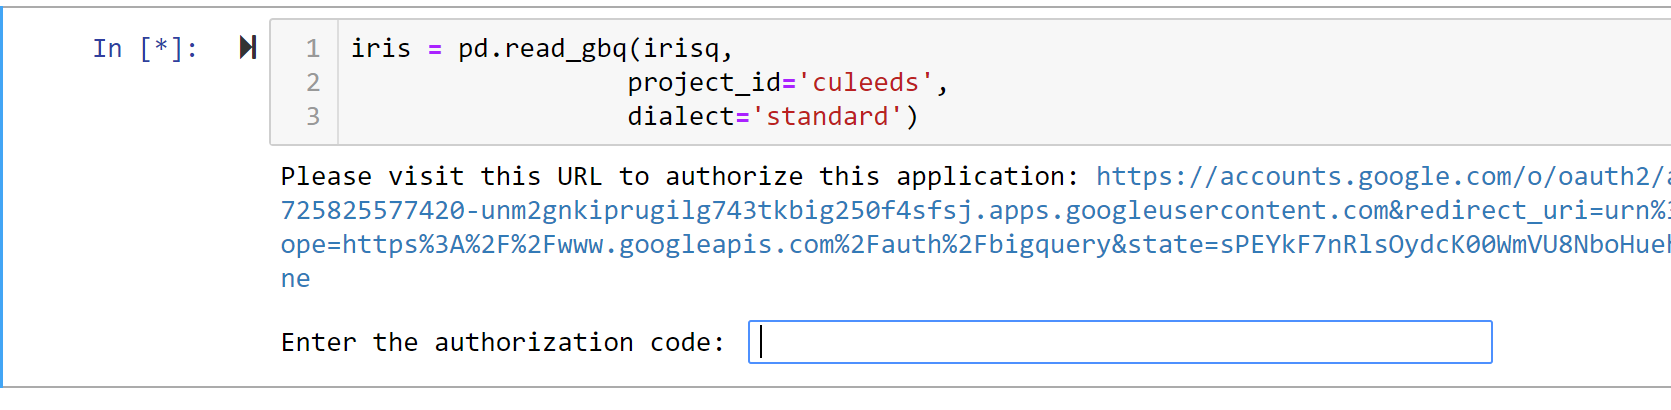

## Create a SQL query Object
>- In the next cell we will define a query object using standard SQL and the BigQuery syntax for accessing tables
>- To get us started, we will query one of Google BigQueries machine learning datasets, `iris`
>>- You can find the iris dataset on BigQuery under the bigquery-public-data, ml_datasets, iris

### In BigQuery, look for the dataset on the left margin under Resources --> bigquery-public-data

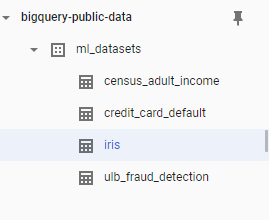

## Define variables for project and dataset
>- This will make our code shorter and easier to type in the long run

In [12]:
public = 'bigquery-public-data'
ml = 'ml_datasets'

## Define a SQL Query Object

In [13]:
irisq = f'''
    SELECT * 
    FROM 
    `{public}.{ml}.iris`
    '''

## Create a pandas DataFrame using `read_gbq`
>- In the next cell we define a DataFrame by:
>>- passing a query object
>>- Setting a project_id from our BigQuery account
>>>- In the example code below my project id is `bqpandas-test` but you will need to insert your project id
>>- Setting the SQL dialect to standard

In [18]:
iris = pd.read_gbq(irisq,
                   project_id = 'cupythone-275001',
                  dialect = 'standard')

Downloading: 100%|████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 225.85rows/s]


## You now should have a pandas DataFrame based on BigQuery data!
>- Check out your datasets by using various pandas functions: shape, head(), etc

### It can be helpful to define a quick function to use to check DataFrames 
>- If you were only working with one dataset this isn't that important but BigQuery has 100's of public datasets you may want to explore!

In [19]:
def dfinfo(df):
    print(f'df shape: {df.shape}')
    return df.head(5)

In [21]:
dfinfo(iris)

df shape: (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,2.5,3.0,1.1,versicolor
1,5.0,2.0,3.5,1.0,versicolor
2,5.7,2.6,3.5,1.0,versicolor
3,6.0,2.2,4.0,1.0,versicolor
4,5.8,2.6,4.0,1.2,versicolor


## Now, let's create a new DataFrame that will store descriptive statistics 

In [24]:
irisdesc = iris.describe()
irisdesc

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## We can process/analyze data in python, and then export back into BigQuery for storage

>- For more information and optional parameters see below link
>>- https://pandas-gbq.readthedocs.io/en/latest/writing.html

In [26]:
pbq.to_gbq(
    irisdesc, #name of the df you want to export to BigQuery
    'testdata.irisdesc', #datasetName.tableName
    project_id = 'cupythone-275001', #name of the project, specific
    if_exists = 'replace' #optional, replace will overwrite existing table, fail will return an error
    )

1it [00:09,  9.24s/it]


## You should now see the new table in your BigQuery Dataset!
>- You need to refresh your BigQuery browser but then you should be able to find your new dataset

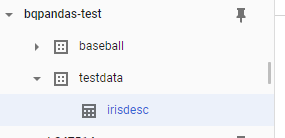

# Cool Stuff!
>- Now you should be able to access 100's of public datasets from BigQuery, process and analyze the data using `pandas`, and store your resulting tables back in BigQuery!
>- You can find a list of BigQuery's public datasets at the following link. There is a topic of interest here for everyone!
>>- Note: as of this lecture, BigQuery is providing public datasets to track and analyze the Covid-19 pandemic

https://console.cloud.google.com/marketplace/browse?filter=solution-type:dataset
